# 파이토치 기본 - 텐서

In [1]:
import torch
import numpy as np

x = torch.empty(5,4) #5x4인 빈 텐서 생성
print(x)

tensor([[1.5444e+25, 1.6217e-19, 7.0062e+22, 1.6795e+08],
        [4.7423e+30, 4.7393e+30, 9.5461e-01, 4.4377e+27],
        [1.7975e+19, 4.6894e+27, 7.9463e+08, 3.2604e-12],
        [2.6209e+20, 4.1641e+12, 1.9434e-19, 3.0881e+29],
        [6.3828e+28, 1.4603e-19, 7.7179e+28, 7.7591e+26]])


In [2]:
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [3]:
torch.rand(5,6)

tensor([[0.7647, 0.8334, 0.3475, 0.1174, 0.2105, 0.2956],
        [0.6141, 0.0162, 0.5585, 0.7545, 0.7722, 0.5259],
        [0.3234, 0.4119, 0.5167, 0.4395, 0.9945, 0.2556],
        [0.5006, 0.4589, 0.7413, 0.8730, 0.3398, 0.7368],
        [0.7503, 0.1365, 0.3600, 0.5081, 0.1621, 0.8800]])

리스트 넘파이 배열을 텐서로 만들기: torch.tensor()

In [6]:
ls = [13,4]
r = np.array([4,56,7])
torch.tensor(ls)

tensor([13,  4])

In [7]:
torch.tensor(r)

tensor([ 4, 56,  7])

텐서의 크기 타입 연산 

In [8]:
x.size()

torch.Size([5, 4])

In [13]:
x.size()[1]

2

In [10]:
type(x)

torch.Tensor

In [11]:
x = torch.rand(2,2)
y = torch.rand(2,2)
y.add(x)

tensor([[0.4154, 1.1977],
        [0.5112, 1.2364]])

In [12]:
y.add_(x)
#y에 inplace

tensor([[0.4154, 1.1977],
        [0.5112, 1.2364]])

텐서의 크기 변환

In [14]:
x = torch.rand(8,8)
print(x.size())

torch.Size([8, 8])


In [15]:
a = x.view(64) #view: 크기 바꿔줌
print(a.size())

torch.Size([64])


In [16]:
b = x.view(-1,4,4) #-1은 원래 크기가 되게 하는 값, 즉 4이다
print(b.size())

torch.Size([4, 4, 4])


## 역전파

In [17]:
import torch
x=torch.ones(2,2,requires_grad=True) #require_grad: 해당 텐서 기준으로 모든 연산 추적해 그래디언트 계산
y=x+1
z = 2*y**2
r = z.mean()
print(r)

tensor(8., grad_fn=<MeanBackward0>)


In [18]:
r.backward()

In [19]:
print(x.grad) #dr/dx: r을 x로 미분한 값

tensor([[2., 2.],
        [2., 2.]])


In [20]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

## 자동미분: 선형회귀식

In [22]:
#varialbe 사용하지 않고 tensor 바로 사용해서 자동미분
from matplotlib import pyplot as plt
x = torch.FloatTensor(range(5)).unsqueeze(1) #원래 크기는 1차원인 torch.Size(5) 여서 행렬 계산을 위해 2차원 배열로 만들어준다.
#unsqueeze(1)은 1번째 위치의 차원을 늘려주는 역할을 한다. 즉 toch(5,1)의 사이즈를 가진다
y = 2*x + torch.rand(5,1)
num_features = x.shape[1]
print(num_features) #인스턴스의 개수가 5개, 피처의 개수 1개

1


In [23]:
w = torch.randn(num_features,1,requires_grad = True)
# y = xw + b
# w는 5x1의 데이터아 곱할 수 있어야 하고 예측값이 하나로 나와야해서 크기가 1x1인 배열로 정의한다
b = torch.randn(1,requires_grad = True)

In [24]:
#w와 b를 찾는것이 목적이다
#SGD 사용해보자
learning_rate = 1e-3
optimizer = torch.optim.SGD([w,b],lr=learning_rate)

loss_stack = [] #매 epoch마다 손실함수값 저장
for epoch in range(1001):
    
    optimizer.zero_grad()#optimizer초기화
    y_hat = torch.matmul(x,w) + b #예측
    loss = torch.mean((y_hat-y)**2)
    loss.backward() 
    optimizer.step() #최적화 진행
    loss_stack.append(loss.item()) #손실함수값을 loss_stack에 하나씩 넣는다.
    
    if epoch & 100 ==0:
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:59.15520095825195
Epoch 1:57.58098602294922
Epoch 2:56.048683166503906
Epoch 3:54.55718994140625
Epoch 8:47.67464828491211
Epoch 9:46.40612030029297
Epoch 10:45.171363830566406
Epoch 11:43.969482421875
Epoch 16:38.42340087890625
Epoch 17:37.40119552612305
Epoch 18:36.40620803833008
Epoch 19:35.437705993652344
Epoch 24:30.968563079833984
Epoch 25:30.144847869873047
Epoch 26:29.343067169189453
Epoch 27:28.5626277923584
Epoch 128:1.899784803390503
Epoch 129:1.8500083684921265
Epoch 130:1.8015568256378174
Epoch 131:1.7543939352035522
Epoch 136:1.5367558002471924
Epoch 137:1.496640682220459
Epoch 138:1.4575932025909424
Epoch 139:1.4195845127105713
Epoch 144:1.2441866397857666
Epoch 145:1.2118571996688843
Epoch 146:1.1803885698318481
Epoch 147:1.1497565507888794
Epoch 152:1.0083978176116943
Epoch 153:0.9823415875434875
Epoch 154:0.9569793939590454
Epoch 155:0.9322913289070129
Epoch 256:0.08757089078426361
Epoch 257:0.0859789103269577
Epoch 258:0.0844288021326065
Epoch 259:0.082919515

In [25]:
with torch.no_grad(): #구문에 있는 requires_grad 작동하지 않는다
    y_hat = torch.matmul(x,w) + b

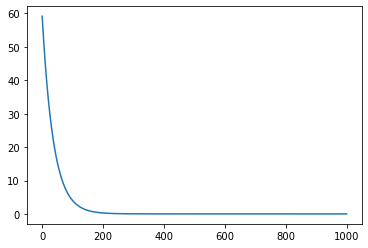

In [26]:
plt.plot(loss_stack)

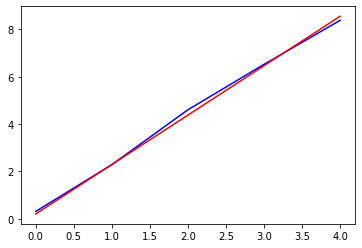

In [29]:
plt.plot(x,y,'b')
plt.plot(x,y_hat,'r')
plt.show()

## 데이터 불러오기

In [55]:
import torch 
import torchvision
import torchvision.transforms as tr
from torch.utils.data import DataLoader,Dataset
import numpy as np
import matplotlib.pyplot as plt

In [58]:
transf = tr.Compose([tr.Resize(16),tr.ToTensor()]) # tr.compose내에 원하는 전처리 차례대로 넣어준다
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transf) #학습 데이터 불러오기
testset = torchvision.datasets.CIFAR10(root='./data',train=True,download=False,transform=transf) #테스트 데이터 불러오기

Files already downloaded and verified


In [61]:
print(trainset[0][0].size())

#데이터셋은 이미지와 라벨이 동시에 들어가있는 튜플형태
#trainset[0]은 학습데이터의 첫번쨰 데이터로 이미지 한장 + 라벨숫자 한장
#즉 trainset[0][0]은 이미지, trainset[0][1]은 라벨
# 3x16x16에서 3은 채널 수, 16x16은 이미지의 너비와 높이 의미

torch.Size([3, 16, 16])


In [63]:
trainloader = DataLoader(trainset,batch_size=50,shuffle=True)
testloader = DataLoader(testset,batch_size=50,shuffle=False)
#DataLoader은 데이터를 미니배치 사이즈로 만들어준다

In [64]:
len(trainloader)

1000

In [66]:
images,labels = iter(trainloader).next()
print(images.size()) #배치 하나에 50개의 이미지가 잘 들어가있음

torch.Size([50, 3, 16, 16])


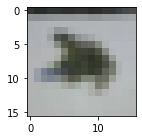

In [68]:
oneshot = images[1].permute(1,2,0).numpy() #pernute는 기존 차원의 위치 0,1,2를 1,2,0으로 변환
#0번째의 크기가 3인 텐서를 마지막으로 보낸다
plt.figure(figsize=(2,2))
plt.imshow(oneshot)
plt.axis='off'
plt.show()

### 정리되지 않은 커스텀 데이터 불러오기

In [ ]:
#라벨별로 폴더 정리가 되어있지 않은 경우가 많다
# 다른 작업들과 공유된 데이터는 폴더정리가 어렵다
#이미지 데이터라도 텍스트, 리스트 등의 다른 형태로 저장되어 있는 경우도 있다. 

In [75]:
#케스텀 데이터 세트 예시: 현재 32x32크기인 RGB 이미지 100장과 그에대한 라벨 + 넘파이 배열로 정리가 되어 있다고 한다.
train_images = np.random.randint(256,size=(100,32,32,3))/255
train_labels = np.random.randint(2,size=(100,1))

class TensorData(Dataset):
    def __init__(self,x_data,y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.x_data = self.x_data.permute(0,3,1,2)
        self.y_data = torch.LongTensor(y_data)
        self.len = self.y_data.shape[0]
        
    def __getitem__(self,index): #인덱스에 해당하는 샘플 찾아서 준다
        return self.x_data[index],self.y_data[index]
    
    def __len__(self):
        return self.len

In [76]:
train_data = TensorData(train_images,train_labels)
train_loader = DataLoader(train_data,batch_size = 10, shuffle = True)

# 인공 신경망

## 다층 퍼셉트론

In [30]:
x = torch.FloatTensor(range(5)).unsqueeze(1) 
y = 2*x + torch.rand(5,1)

In [37]:
import torch.nn as nn
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1,1,bias = True) #nn.Linear(N,M,bias): N: 입력변수 개수, M: 출력변수 개수, 
        
    def forward(self,x):
        y = self.fc(x)

In [38]:
model = LinearRegressor()
learning_rate = 1e-3
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate) #최적화 방법에 모델 파라미터 넣어주는 방법

In [42]:
loss_stack = [] 
for epoch in range(1001):
    
    optimizer.zero_grad()#optimizer초기화
    
    y_hat = model(x)
    loss = criterion(y_hat,y)
    
    loss.backward() 
    optimizer.step() #최적화 진행
    loss_stack.append(loss.item()) #손실함수값을 loss_stack에 하나씩 넣는다.
    
    if epoch & 100 ==0:
        print(f'Epoch {epoch}:{loss.item()}')

AttributeError: 'NoneType' object has no attribute 'size'

## 집값 예측하기: MLP

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch import nn,optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('reg.csv',index_col=[0])

In [48]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,Price
0,0.034633,0.206919,0.137057,0.540526,0.193941,0.699239,0.630532,0.239410,0.027375,0.209857,0.347609,0.996394,0.102644,0.422222
1,0.028920,0.014315,0.276113,0.255945,0.618886,0.555407,0.782263,0.482977,0.103031,0.106690,0.520776,0.996650,0.187120,0.368889
2,0.020627,0.033230,0.281116,0.525591,0.165269,0.624102,0.586005,0.272713,0.036010,0.106986,0.595301,0.983284,0.084079,0.660000
3,0.022749,0.033801,0.125044,0.263253,0.251509,0.658532,0.432160,0.344932,0.150018,0.068317,0.651297,0.989989,0.015990,0.631111
4,0.022148,0.029374,0.121057,0.521126,0.399670,0.448086,0.520158,0.495342,0.104383,0.069360,0.560116,0.998723,0.092782,0.693333


In [51]:
X = df.drop('Price',axis=1).to_numpy()
y = df['Price'].to_numpy().reshape(-1,1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [78]:
#텐서 데이터 만들기
class TensorData(Dataset):
    
    def __init__(self,x_data,y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.y_data = torch.FloatTensor(y_data)
        self.len = self.y_data.shape[0]
        
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    
    def __len__(self):
        return self.len

In [80]:
trainsets = TensorData(X_train,y_train)
trainloader = torch.utils.data.DataLoader(trainsets,batch_size=32,shuffle=True)
testsets = TensorData(X_test,y_test)
testloader = torch.utils.data.DataLoader(testsets,batch_size=32,shuffle=False)
#dataloader: 미니배치로 자름

In [84]:
#모델 구축하기: regressor 입력층1개, 은닉층2개, 출력층1개, 입령층노드 13개, 출력층노드 1개
#은닉층은 50개, 30개 노드 갖는다 한다.

class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(13,50,bias = True) #입력층 13 >> 은닉층1(50)으로 가는 연산
        self.fc2 = nn.Linear(50,30,bias = True)
        self.fc3 = nn.Linear(30,1,bias = True)
        self.dropout = nn.Dropout(0.5) #과적합 방지
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
        
        return x

In [85]:
#모델 학습하기
model = Regressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001,weight_decay = 1e-7)

In [88]:
loss_ = []
n = len(trainloader)
for epoch in range(400): #
    running_loss = 0.0 #초기값 0
    for data in trainloader: #배치 불러와 학습
        inputs, values = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs,values)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    loss_.append(running_loss/n)

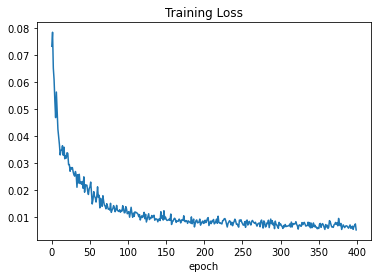

In [90]:
#손실함수값 그려보자
plt.plot(loss_)
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [95]:
def evaluation(dataloader):
    
    predictions = torch.tensor([], dtype=torch.float) # 예측값을 저장하는 텐서
    actual = torch.tensor([], dtype=torch.float) # 실제값을 저장하는 텐서
        
    with torch.no_grad():
        model.eval() # 평가를 할 때에는 .eval() 반드시 사용해야 한다.
        for data in dataloader:
            inputs, values = data
            outputs = model(inputs)

            predictions = torch.cat((predictions, outputs), 0) # cat을 통해 예측값을 누적
            actual = torch.cat((actual, values), 0) # cat을 통해 실제값을 누적
    
    predictions = predictions.numpy() # 넘파이 배열로 변경
    actual = actual.numpy() # 넘파이 배열로 변경
    rmse = np.sqrt(mean_squared_error(predictions, actual)) # sklearn을 이용하여 RMSE 계산
    
    return rmse  

In [96]:
print('train RMSEL',evaluation(trainloader))
print('test RMSE:', evaluation(testloader))

train RMSEL 0.059102874
test RMSE: 0.116942436


In [97]:
#학습데이터에 과적합 되어있는 듯 하다. 

## 모델 구조 및 가중치 확인

In [99]:
!pip install torchsummary

In [100]:
from torchsummary import summary

In [101]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(13,50,bias = True) #입력층 13 >> 은닉층1(50)으로 가는 연산
        self.fc2 = nn.Linear(50,30,bias = True)
        self.fc3 = nn.Linear(30,1,bias = True)
        self.dropout = nn.Dropout(0.5) #과적합 방지
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
        
        return x

In [103]:
model = Regressor()
print(model)

Regressor(
  (fc1): Linear(in_features=13, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [104]:
#모델 변수
for parameter in model.parameters():
    print(parameter.size())

torch.Size([50, 13])
torch.Size([50])
torch.Size([30, 50])
torch.Size([30])
torch.Size([1, 30])
torch.Size([1])


In [105]:
#model.parameters()를 통해 정의된 순서대로 변수 얻을 수 있따. 

for name,param in model.named_parameters(): #model.named_parameters() 통해 변수명과 변수를 동시에 불러온다.
    print(name,param.size())

fc1.weight torch.Size([50, 13])
fc1.bias torch.Size([50])
fc2.weight torch.Size([30, 50])
fc2.bias torch.Size([30])
fc3.weight torch.Size([1, 30])
fc3.bias torch.Size([1])


In [106]:
summary(model,(10,13))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 10, 50]             700
            Linear-2               [-1, 10, 30]           1,530
           Dropout-3               [-1, 10, 30]               0
            Linear-4                [-1, 10, 1]              31
Total params: 2,261
Trainable params: 2,261
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.01
Estimated Total Size (MB): 0.02
----------------------------------------------------------------
